In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
N = 100 #number of selected points

In [ ]:
#definition of base functions
def sin(x):
  return np.sin(x)
def sinInvX(x):
  return np.sin(np.power(x, -1))
def ySgn(x):
  return np.sign(np.sin(8*x))
def cosPowX(x):
  return np.cos(np.power(x,2))

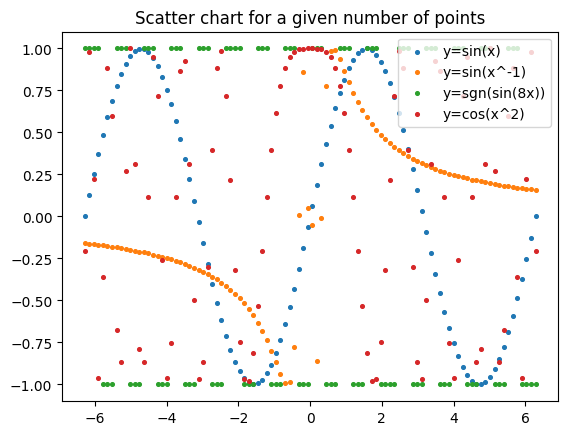

In [ ]:
#selection of points and generation of values for these points
genx = np.linspace(-2*np.pi, 2*np.pi, N)
ysin= sin(genx)
ysininvx = sinInvX(genx)
ysgn = ySgn(genx)
ycos = cosPowX(genx)
width = np.abs(genx[1]-genx[0])
y = [ysin,ysininvx,ysgn]

_ = plt.scatter(genx, ysin, label='y=sin(x)', s=7)
_ = plt.scatter(genx, ysininvx, label='y=sin(x^-1)', s=7)
_ = plt.scatter(genx, ysgn, label='y=sgn(sin(8x))', s=7)
_ = plt.scatter(genx,ycos,label='y=cos(x^2)',s=7)
plt.title("Scatter chart for a given number of points")
plt.legend(loc='upper right')
plt.show()

In [ ]:
#definition of interpola kernels and MSE function
def kernelH1(x, offset: float, width: float,a=0):
  x = x - offset
  return (x >= 0) * (x < width)
def kernelH2(x,offset: float, width: float,a=0):
  x = x - offset
  return (x >= (-1 * width / 2)) * (x < width / 2)
def kernelH3(x,offset: float, width: float,a=0):
  x = x - offset
  x = x / width
  return (1 - np.abs(x)) * (np.abs(x) < 1)
def kernelH4(x,offset: float, width: float, a):
  x = x - offset
  x = x / width
  return (x >= -a) * (x < a) * np.sinc(x)
kernels = [kernelH1,kernelH2,kernelH3,kernelH4]
def MSE(trueValue,value):
  if len(trueValue) != len(value):
    return False
  else:
    sum = 0
    for y,yi in zip(trueValue,value):
      sum += pow(y-yi,2)
    return str((1/len(trueValue))*sum)

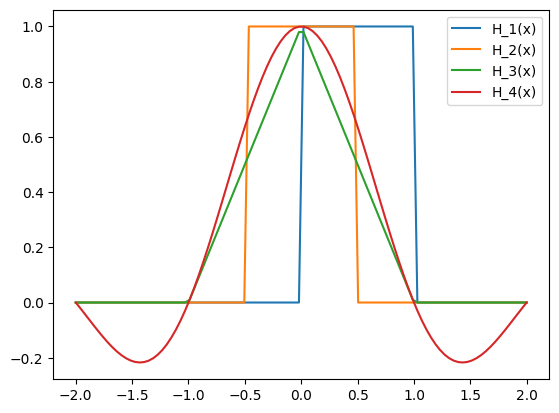

In [ ]:
#examle of kernel
xnp = np.linspace(-2, 2, N)
_=plt.plot(xnp,kernelH1(xnp, 0, 1), label='H_1(x)')
_=plt.plot(xnp,kernelH2(xnp, 0, 1), label='H_2(x)')
_=plt.plot(xnp,kernelH3(xnp, 0, 1), label='H_3(x)')
_=plt.plot(xnp,kernelH4(xnp, 0, 1,2), label='H_4(x)')
plt.legend(loc='upper right')
plt.show()

In [ ]:
def genInterpolation(realX,realY,w,multiplier,kernel,a=0):
  """
  @param
  w - with
  """
  if len(realX) != len(realY):
    print("Error: Quantity x is not equal to y")
    return 0
  j = -1
  yInt = []
  for i in range(len(realX)*multiplier):
    if i%multiplier==0:
       j+=1
    yInt.append(kernel(realX[j],0,w,a)*realY[j]+realY[j])
  return yInt

In [ ]:
x2 = np.linspace(-2*np.pi, 2*np.pi, N*2)
x4 = np.linspace(-2*np.pi, 2*np.pi, N*4)
x6 = np.linspace(-2*np.pi, 2*np.pi, N*6)
x10 = np.linspace(-2*np.pi, 2*np.pi, N*10)

Interpolacja wielomanowa Poczytać o tym

okres nie jest równomierny



In [ ]:
y1 = genInterpolation(genx,ysin,width,2,kernelH2,a=0)
y2 = genInterpolation(genx,ysin,width,4,kernelH2,a=0)
y3 = genInterpolation(genx,ysin,width,6,kernelH2,a=0)
y4 = genInterpolation(genx,ysin,width,10,kernelH2,a=10_000)

plt.plot(x2,y1)
plt.title("Sin(x), KernelH2, 2x, MSE: "+MSE(sin(x2),y1))
plt.plot(x2,sin(x2))
plt.show()

print(MSE(sin(x2),y1)+"\n"+MSE(sin(x4),y2)+"\n"+MSE(sin(x6),y3)+"\n"+MSE(sin(x10),y4))

In [ ]:
y1 = genInterpolation(genx,ysininvx,width,2,kernelH2,a=0)
y2 = genInterpolation(genx,ysininvx,width,4,kernelH2,a=0)
y3 = genInterpolation(genx,ysininvx,width,6,kernelH2,a=0)
y4 = genInterpolation(genx,ysininvx,width,10,kernelH2,a=10_000)

plt.plot(x4,y2)
plt.title("sin(x^-1), KernelH2, 4x, MSE: "+MSE(sinInvX(x4),y2))
plt.plot(x4,sinInvX(x4))
plt.show()

print(MSE(sinInvX(x2),y1)+"\n"+MSE(sinInvX(x4),y2)+"\n"+MSE(sinInvX(x6),y3)+"\n"+MSE(sinInvX(x10),y4))

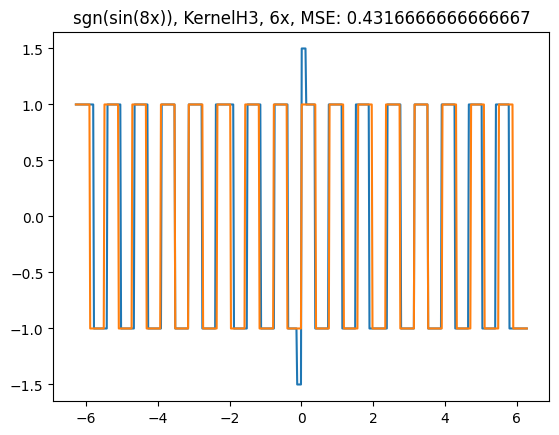

0.325
0.405
0.4316666666666667
0.437


In [ ]:
y1 = genInterpolation(genx,ysgn,width,2,kernelH3,a=0)
y2 = genInterpolation(genx,ysgn,width,4,kernelH3,a=0)
y3 = genInterpolation(genx,ysgn,width,6,kernelH3,a=0)
y4 = genInterpolation(genx,ysgn,width,10,kernelH3,a=10_000)

plt.plot(x6,y3)
plt.title("sgn(sin(8x)), KernelH3, 6x, MSE: "+MSE(ySgn(x6),y3))
plt.plot(x6,ySgn(x6))
plt.show()


print(MSE(ySgn(x2),y1)+"\n"+MSE(ySgn(x4),y2)+"\n"+MSE(ySgn(x6),y3)+"\n"+MSE(ySgn(x10),y4))

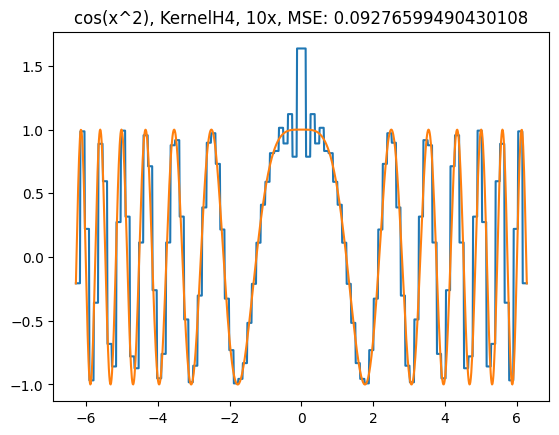

0.05247575566402544
0.07702036731520473
0.08567193533792872
0.09276599490430108


In [ ]:
y1 = genInterpolation(genx,ycos,width,2,kernelH4,a=10_000)
y2 = genInterpolation(genx,ycos,width,4,kernelH4,a=10_000)
y3 = genInterpolation(genx,ycos,width,6,kernelH4,a=10_000)
y4 = genInterpolation(genx,ycos,width,10,kernelH4,a=10_000)

plt.plot(x10,y4)
plt.title("cos(x^2), KernelH4, 10x, MSE: "+MSE(cosPowX(x10),y4))
plt.plot(x10,cosPowX(x10))
plt.show()


print(MSE(cosPowX(x2),y1)+"\n"+MSE(cosPowX(x4),y2)+"\n"+MSE(cosPowX(x6),y3)+"\n"+MSE(cosPowX(x10),y4))